In [1]:
import numpy as np
import os
import pandas as pd
import ast

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab

from matplotlib import transforms
from tqdm import tqdm

In [2]:
tqdm.pandas()

In [3]:
%matplotlib inline

In [4]:
path = "../data/processed/mediapipe/tamires/"

In [5]:
def get_all_files(data_path):
    files_path_list = []
    for path, subdirs, files in os.walk(data_path):
        for name in files:
            if name.endswith(".csv"):
                files_path_list.append(os.path.join(path, name))
    return files_path_list

In [6]:
def plot_x_y_save(img_x,img_y,kind="mediapipe", name="image", save=True):
    base = plt.gca().transData
    rot = transforms.Affine2D().rotate_deg(180)
    plt.axis('off')
    plt.plot(img_x,img_y, 'o', c='black', transform= rot + base)
    plt.savefig(f"images/{kind}/{name}.jpeg", bbox_inches='tight', pad_inches=0)
    plt.show()

In [7]:
def plot_x_y(img_x,img_y):
    base = plt.gca().transData
    rot = transforms.Affine2D().rotate_deg(180)
    plt.plot(img_x,img_y, 'o', c='black', transform= rot + base)
    plt.show()

In [8]:
def plot_img(img_x, img_y, img_z):
    fig = plt.figure()
    hdl = plt.scatter(img_x,img_y,c=img_z,marker='o',cmap=cm.Greys_r)
    ax = plt.gca()

In [9]:
def get_x_y_data(data):
    img_data_x = []
    img_data_y = []
    for _img in data:
        img_data_x.append(_img[0])
        img_data_y.append(_img[1])
    return img_data_x, img_data_y

In [10]:
def make_dfs_xy(df_all):
    imgs_x, imgs_y = [], []
    count = 0
    img_data_test_x, img_data_test_y  = [], []
    
    for index, row in df_all.iterrows():
        dt_img = ast.literal_eval(row["landmarks"])
        _img_data_test_x, _img_data_test_y = get_x_y_data(dt_img)
        img_data_test_x.append(_img_data_test_x)
        img_data_test_y.append(_img_data_test_y)
        
    df_x, df_y = pd.DataFrame(img_data_test_x), pd.DataFrame(img_data_test_y)
    return df_x, df_y

In [11]:
def save_plot_image(df, folder, img_pre, percent=100):
    #for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    for index, row in df.iterrows():
        _img = ast.literal_eval(row["landmarks"])
        _img_x, _img_y = get_x_y_data(_img)
        plot_x_y_save(_img_x, _img_y, folder, f"{img_pre}_{index+1}")
        _img_x, _img_y = [], []
        if percent != 100:
            if index+1 > int(len(df) * percent):
                break

#### MediaPipe

In [12]:
df_mediapipe_x = pd.read_csv("../data/processed/mediapipe/tamires/landmarks_x.csv", sep=";") 

In [13]:
df_mediapipe_y = pd.read_csv("../data/processed/mediapipe/tamires/landmarks_y.csv", sep=";") 

In [14]:
df_mediapipe_xy = pd.read_csv("../data/processed/mediapipe/tamires/landmarks_xy.csv", sep=";")

In [31]:
for X in df_mediapipe_xy.iloc[0].values:
    dt_test = ast.literal_eval(X)
    for i, _X in enumerate(X):
        print(i)
        break

0


In [25]:
test = [(471, 472),
 (474, 475),
 (470, 471),
 (476, 477),
 (469, 470),
 (472, 469),
 (475, 476),
 (477, 474)]

In [35]:
len(dt_test)

468

#### Dlib

In [37]:
df_dlib = pd.read_csv("../data/processed/dlib/tamires/dlib_output.csv", sep=";") 

In [38]:
df_dlib.head()

,0,1,RostoIntensidade-01Primeira-Acalmar.avi,"[[30, 67], [29, 77], [30, 88], [32, 97], [36, 106], [42, 114], [51, 120], [61, 123], [73, 123], [84, 123], [93, 119], [100, 113], [104, 104], [105, 95], [107, 86], [108, 77], [109, 68], [38, 50], [44, 44], [51, 41], [60, 42], [68, 46], [78, 47], [85, 45], [94, 45], [100, 49], [104, 56], [73, 53], [74, 58], [74, 63], [74, 68], [65, 79], [70, 79], [74, 79], [77, 79], [80, 79], [45, 59], [50, 56], [55, 56], [61, 59], [55, 60], [50, 60], [82, 60], [88, 59], [94, 60], [98, 62], [93, 63], [88, 62], [56, 96], [63, 90], [69, 86], [74, 88], [78, 87], [84, 91], [90, 97], [84, 99], [78, 99], [73, 100], [68, 99], [62, 98], [58, 95], [69, 92], [74, 93], [78, 93], [87, 96], [78, 93], [73, 93], [69, 93]]"
0,1,2,RostoIntensidade-01Primeira-Acalmar.avi,"[[29, 66], [29, 76], [30, 86], [33, 96], [37, ..."
1,2,3,RostoIntensidade-01Primeira-Acalmar.avi,"[[29, 66], [29, 76], [30, 86], [33, 96], [37, ..."
2,3,4,RostoIntensidade-01Primeira-Acalmar.avi,"[[30, 65], [29, 75], [30, 85], [32, 95], [36, ..."
3,4,5,RostoIntensidade-01Primeira-Acalmar.avi,"[[29, 65], [29, 75], [31, 85], [33, 94], [37, ..."
4,5,6,RostoIntensidade-01Primeira-Acalmar.avi,"[[29, 65], [30, 75], [30, 85], [32, 94], [36, ..."


In [39]:
df_dlib.columns = ["0", "1", "2", "3"]

In [40]:
df_dlib

,0,1,2,3
0,1,2,RostoIntensidade-01Primeira-Acalmar.avi,"[[29, 66], [29, 76], [30, 86], [33, 96], [37, ..."
1,2,3,RostoIntensidade-01Primeira-Acalmar.avi,"[[29, 66], [29, 76], [30, 86], [33, 96], [37, ..."
2,3,4,RostoIntensidade-01Primeira-Acalmar.avi,"[[30, 65], [29, 75], [30, 85], [32, 95], [36, ..."
3,4,5,RostoIntensidade-01Primeira-Acalmar.avi,"[[29, 65], [29, 75], [31, 85], [33, 94], [37, ..."
4,5,6,RostoIntensidade-01Primeira-Acalmar.avi,"[[29, 65], [30, 75], [30, 85], [32, 94], [36, ..."
...,...,...,...,...
7627,64,65,RostoIntensidade-10Decima-Zangado.avi,"[[34, 79], [35, 90], [36, 100], [39, 110], [43..."
7628,65,66,RostoIntensidade-10Decima-Zangado.avi,"[[34, 79], [35, 90], [36, 100], [39, 110], [43..."
7629,66,67,RostoIntensidade-10Decima-Zangado.avi,"[[33, 80], [34, 90], [35, 101], [38, 111], [42..."
7630,67,68,RostoIntensidade-10Decima-Zangado.avi,"[[33, 79], [34, 90], [35, 100], [38, 110], [41..."


In [41]:
df_dlib_landmarks = df_dlib.drop(columns=["0", "1", "2"])

In [42]:
df_dlib_landmarks.columns = ["landmarks"]

In [43]:
df_dlib_landmarks

,landmarks
0,"[[29, 66], [29, 76], [30, 86], [33, 96], [37, ..."
1,"[[29, 66], [29, 76], [30, 86], [33, 96], [37, ..."
2,"[[30, 65], [29, 75], [30, 85], [32, 95], [36, ..."
3,"[[29, 65], [29, 75], [31, 85], [33, 94], [37, ..."
4,"[[29, 65], [30, 75], [30, 85], [32, 94], [36, ..."
...,...
7627,"[[34, 79], [35, 90], [36, 100], [39, 110], [43..."
7628,"[[34, 79], [35, 90], [36, 100], [39, 110], [43..."
7629,"[[33, 80], [34, 90], [35, 101], [38, 111], [42..."
7630,"[[33, 79], [34, 90], [35, 100], [38, 110], [41..."


In [44]:
df_dlib_landmarks.to_csv("../data/processed/dlib/tamires/dlib_landmarks.csv", sep=";", index=False)

In [24]:
np.asanyarray(ast.literal_eval(df_dlib_landmarks.iloc[0]['landmarks'])).shape

(68, 2)

### Plotting landmarks

In [23]:
ast.literal_eval(df_dlib_landmarks.iloc[0]["landmarks"])[:3]

[[29, 66], [29, 76], [30, 86]]

In [45]:
img_data_x, img_data_y = get_x_y_data(ast.literal_eval(df_dlib_landmarks.iloc[0]["landmarks"]))

In [46]:
img_data_x[:3]

[29, 29, 30]

#### Dlib

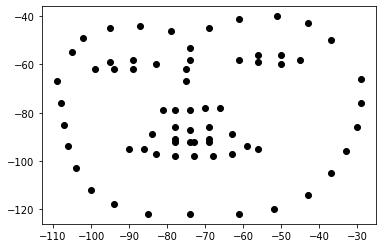

In [47]:
plot_x_y(img_data_x, img_data_y)

In [48]:
df_mediapipe_test =pd.read_csv("data/res.csv", sep=";")

In [51]:
df_mediapipe_test

,0,1
0,0.378416,0.370329
1,0.361016,0.356335
2,0.343453,0.369835
3,0.361037,0.383854
4,0.548591,0.380189
5,0.566236,0.381831
6,0.550037,0.367493
7,0.531109,0.378608
8,0.547260,0.392900


In [53]:
df_mediapipe_test["0"].values

array([0.37841639, 0.36101574, 0.34345254, 0.36103719, 0.54859114,
       0.5662365 , 0.55003661, 0.53110856, 0.54726022])

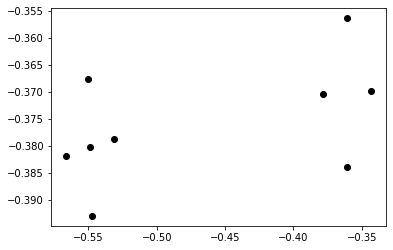

In [54]:
plot_x_y(df_mediapipe_test["0"].values, df_mediapipe_test["1"].values)

#### Saving images for Dlib

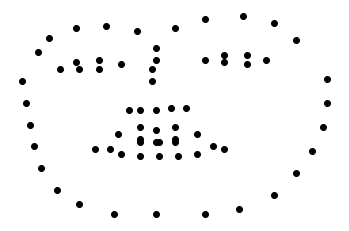

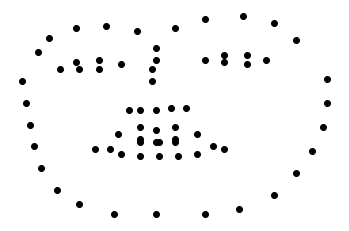

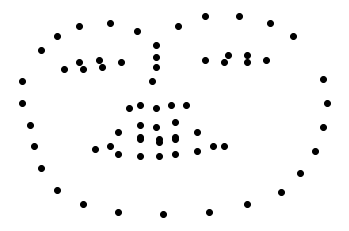

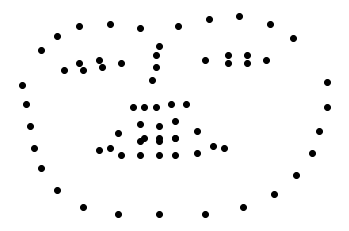

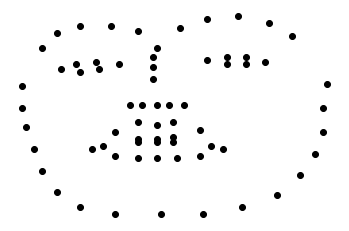

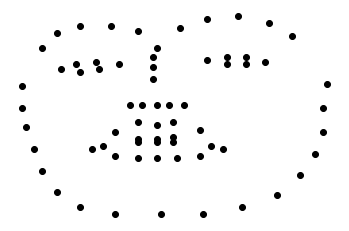

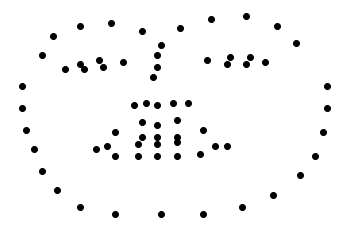

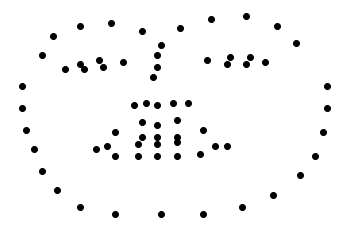

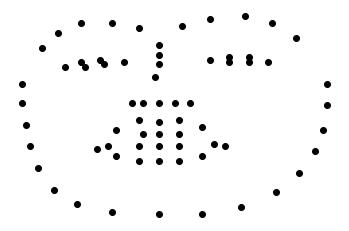

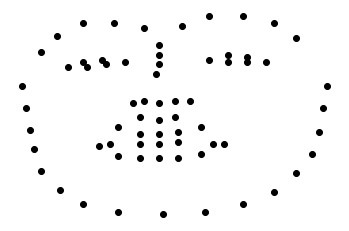

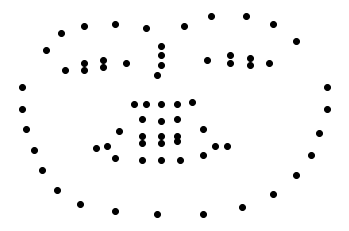

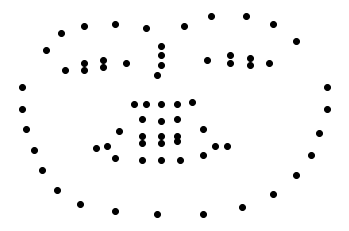

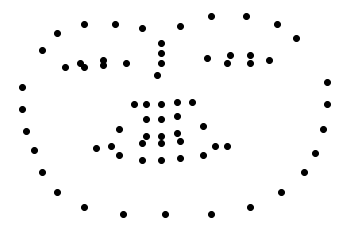

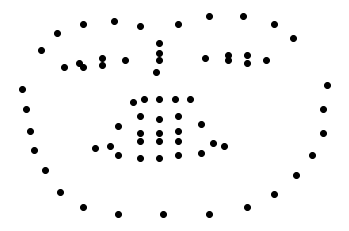

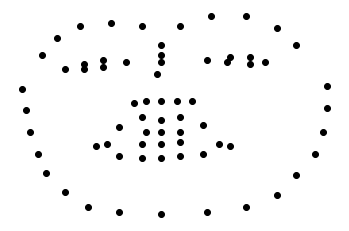

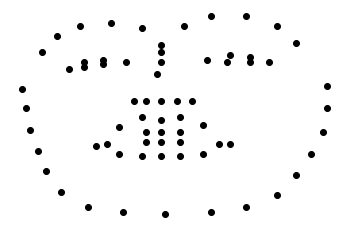

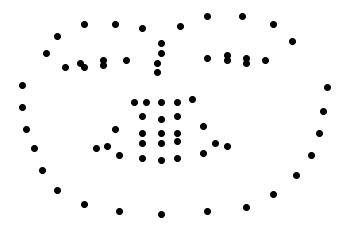

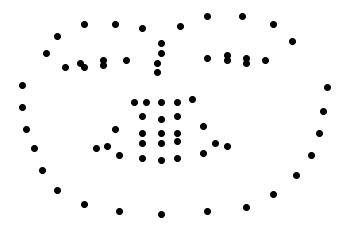

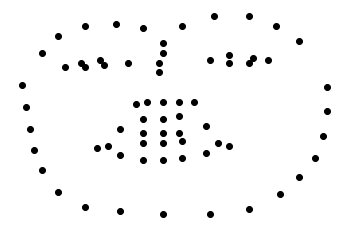

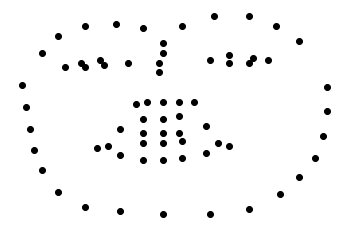

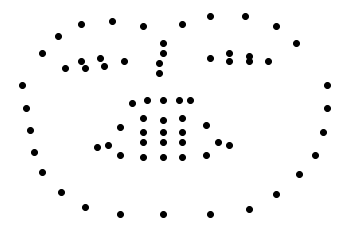

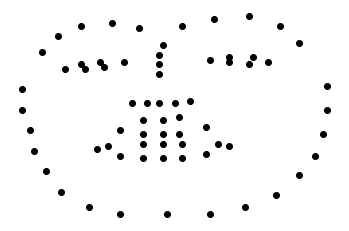

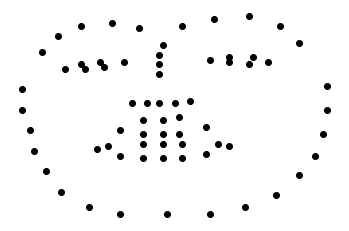

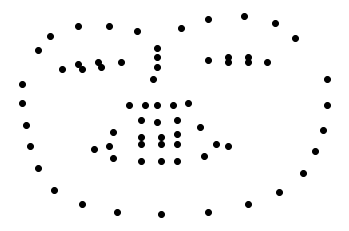

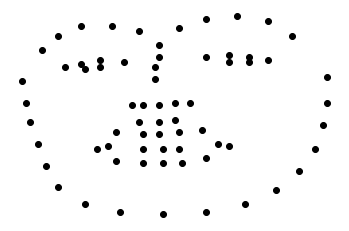

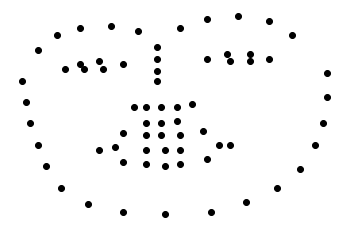

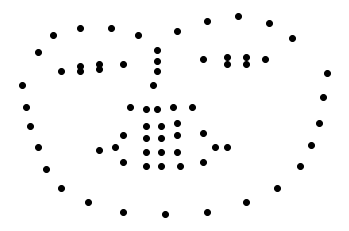

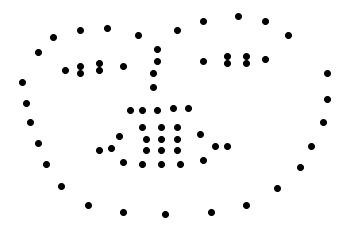

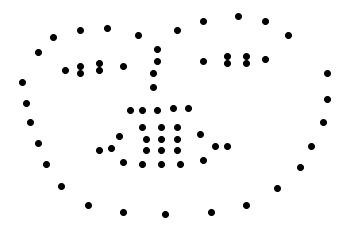

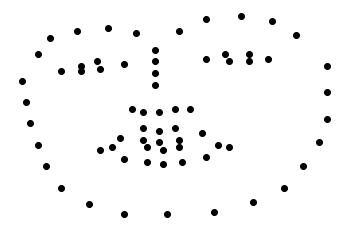

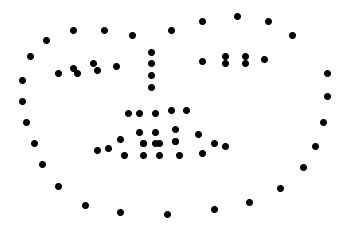

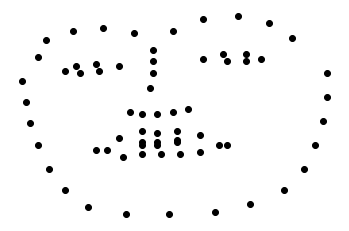

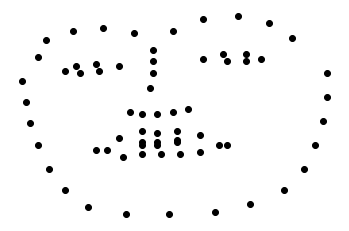

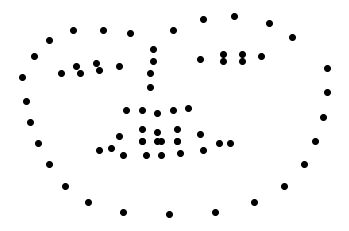

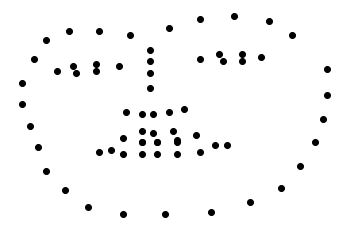

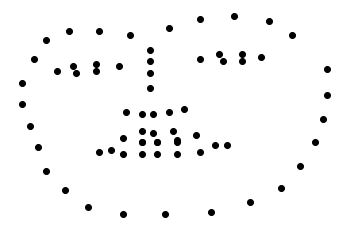

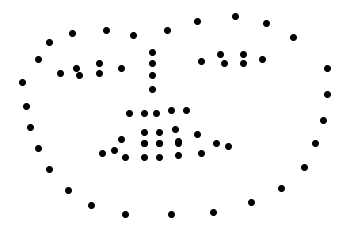

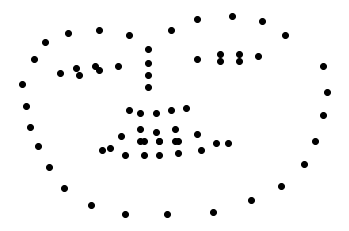

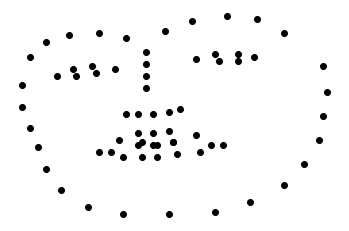

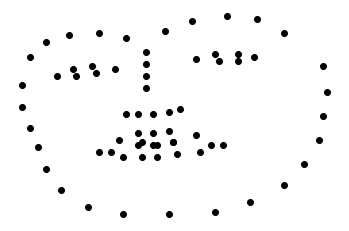

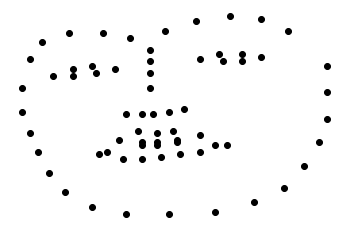

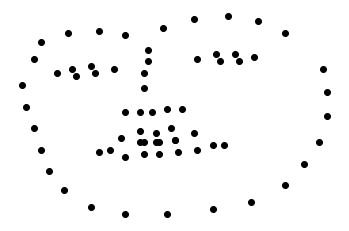

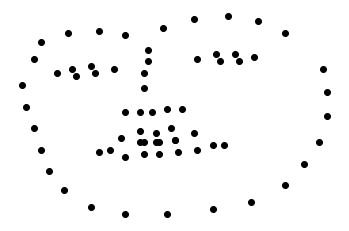

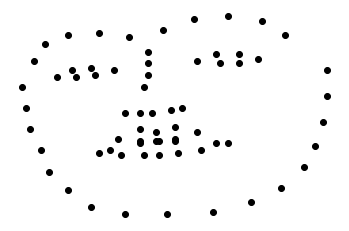

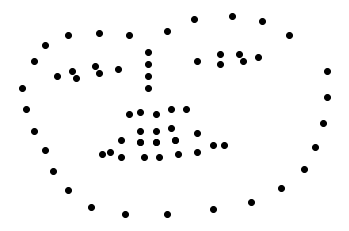

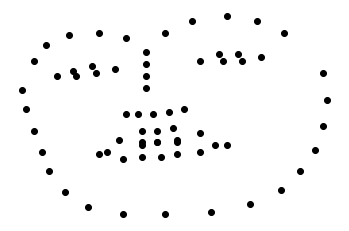

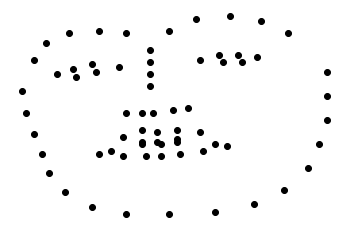

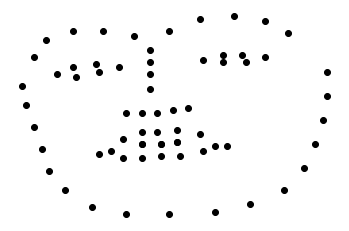

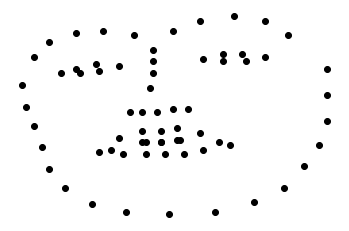

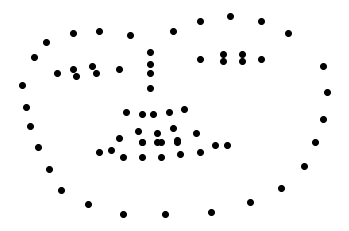

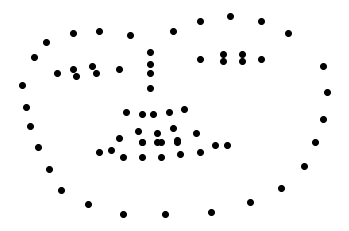

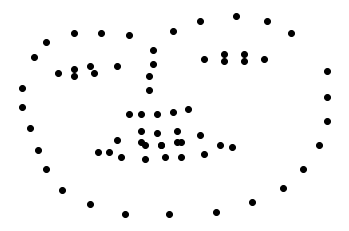

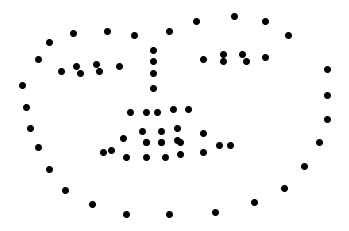

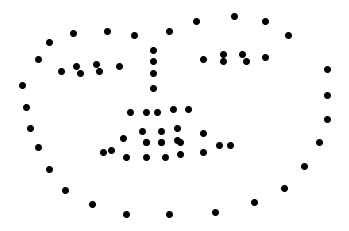

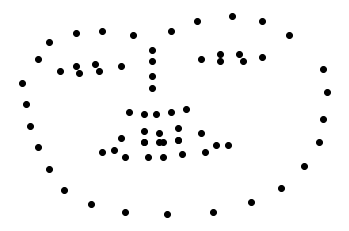

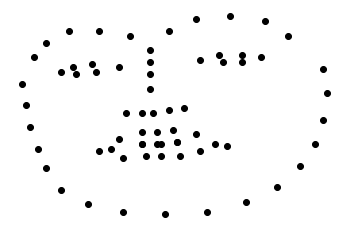

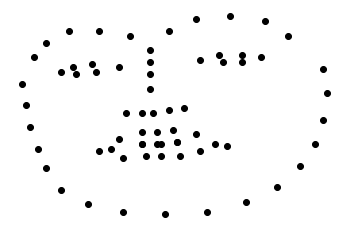

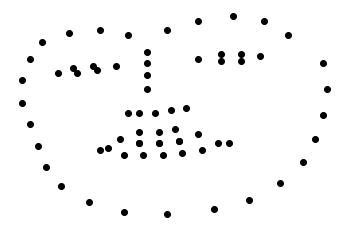

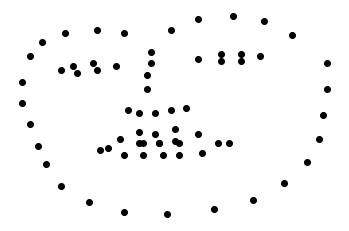

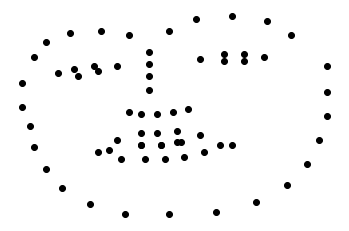

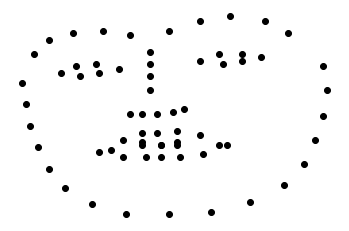

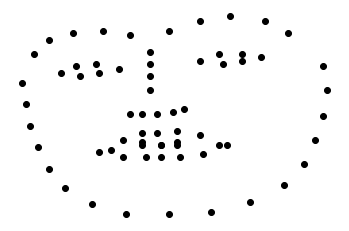

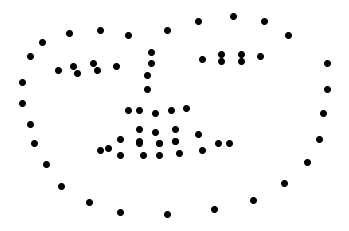

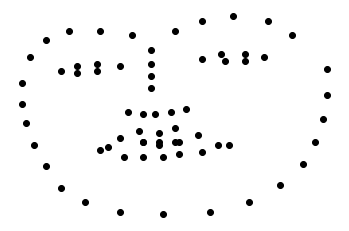

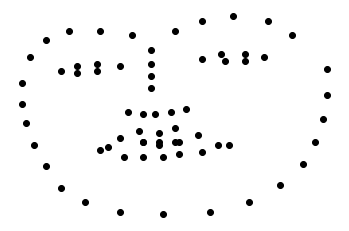

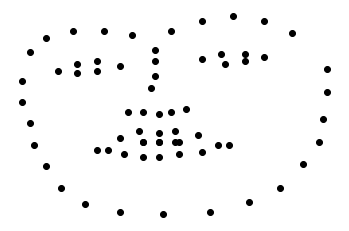

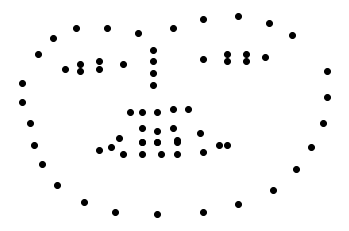

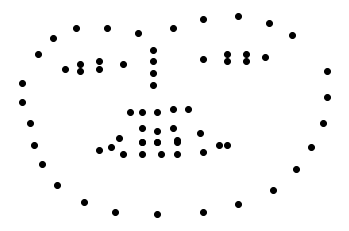

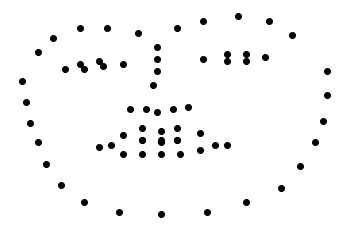

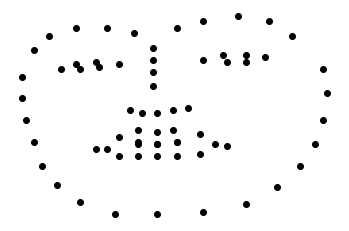

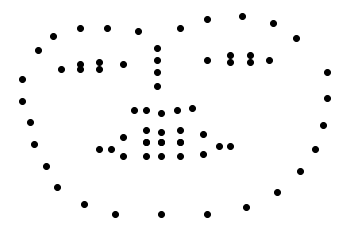

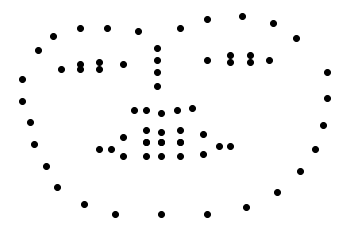

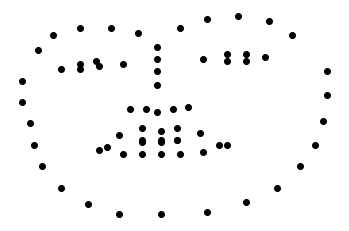

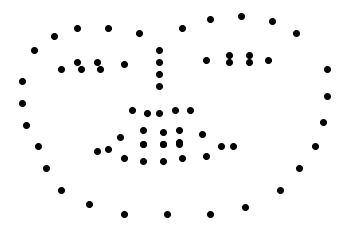

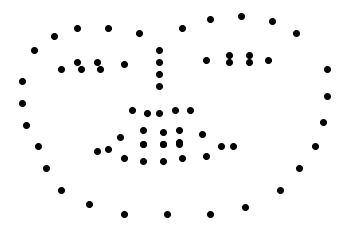

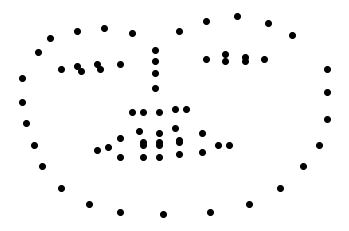

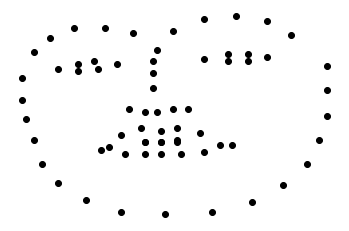

In [44]:
save_plot_image(df_dlib_landmarks, "dlib", "img_dlib", .01)

#### MediaPipe

In [28]:
img_mediapipe_data_x, img_mediapipe_data_y = get_x_y_data(ast.literal_eval(df_mediapipe_xy.iloc[0]["landmarks"]))

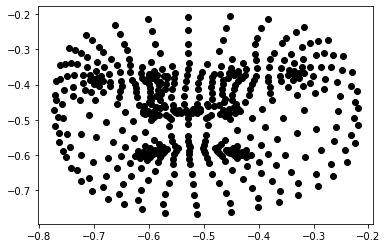

In [29]:
plot_x_y(img_mediapipe_data_x, img_mediapipe_data_y)

In [32]:
df_mediapipe_xy.head()

,landmarks
0,"[[0.5292638540267944, 0.5474205613136292], [0...."
1,"[[0.5315911769866943, 0.5401287078857422], [0...."
2,"[[0.5333443284034729, 0.539849579334259], [0.5..."
3,"[[0.5353459119796753, 0.5288479328155518], [0...."
4,"[[0.5324916243553162, 0.5147410035133362], [0...."


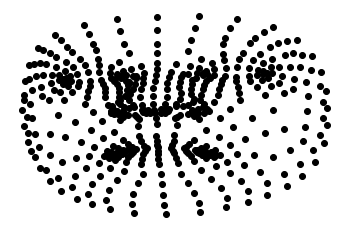

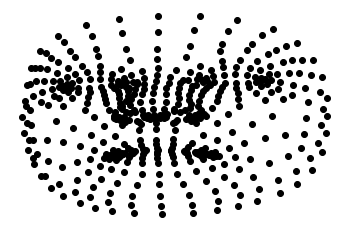

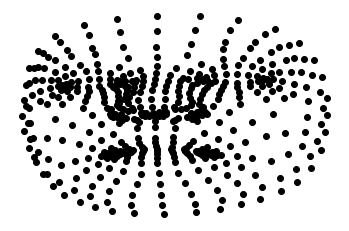

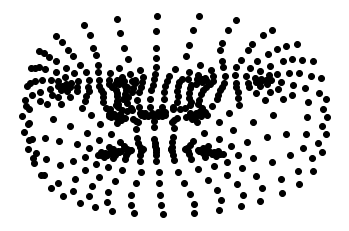

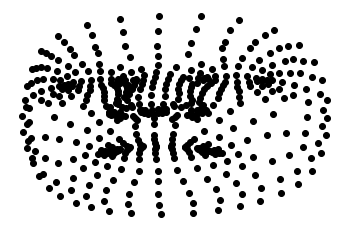

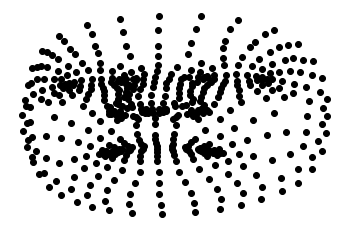

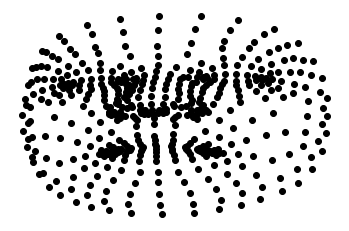

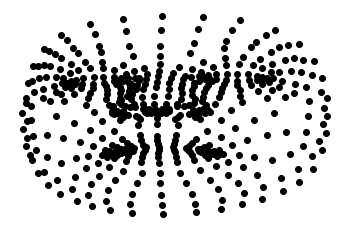

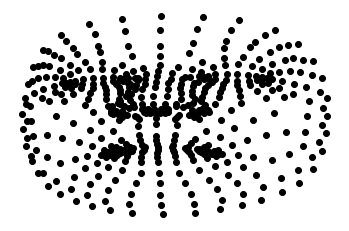

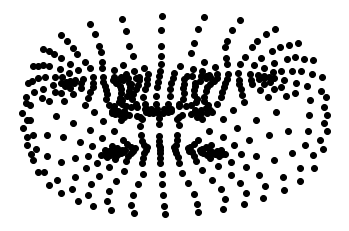

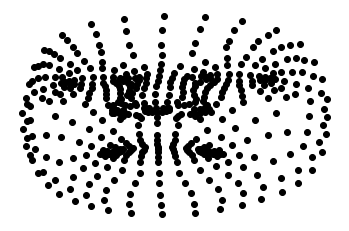

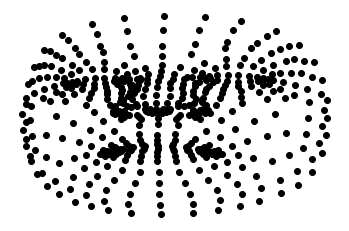

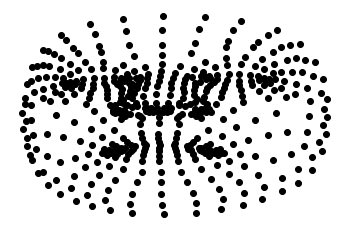

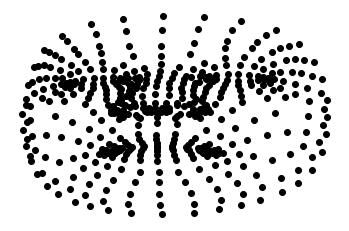

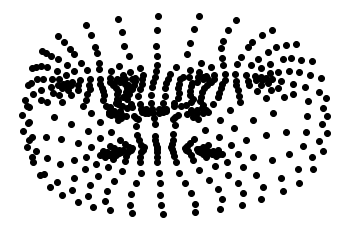

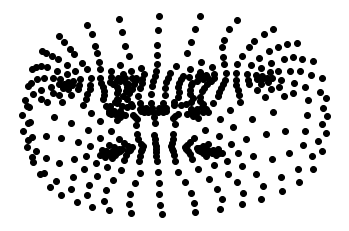

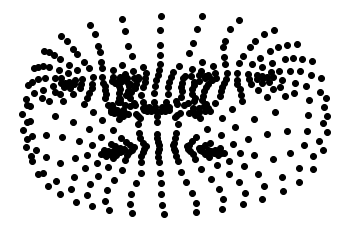

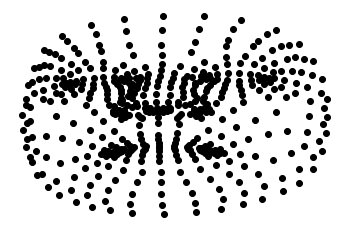

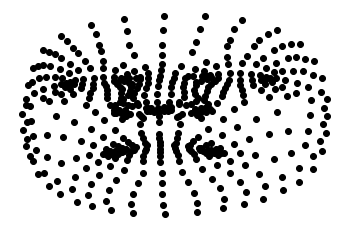

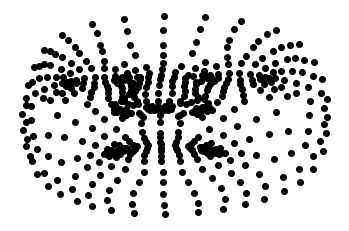

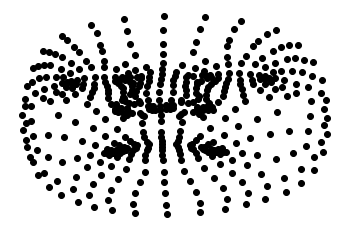

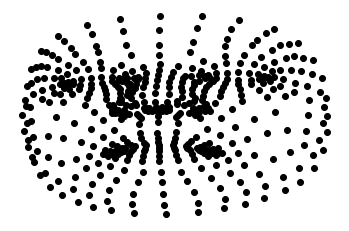

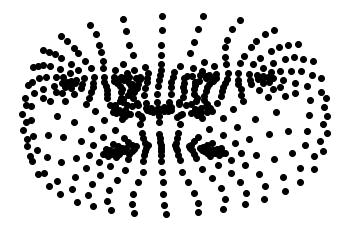

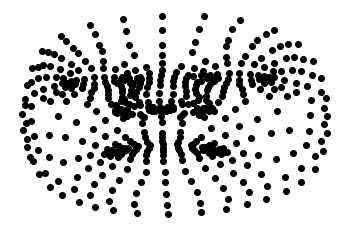

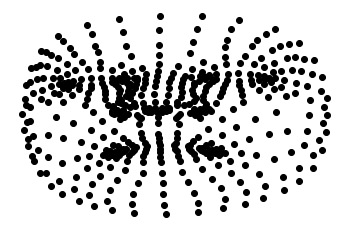

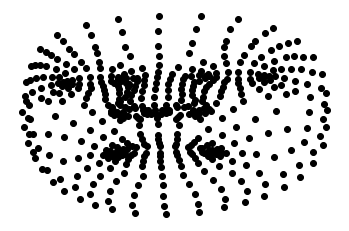

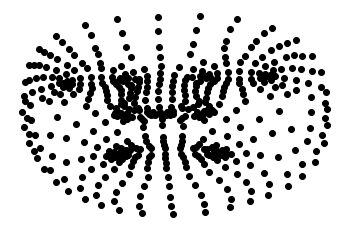

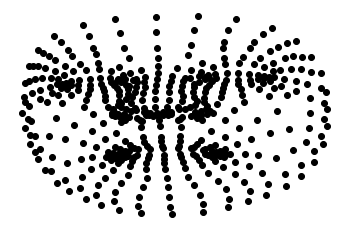

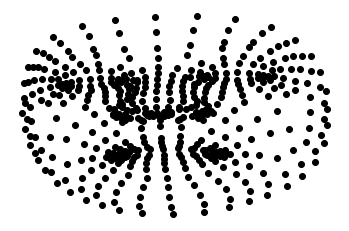

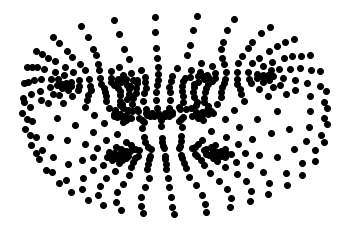

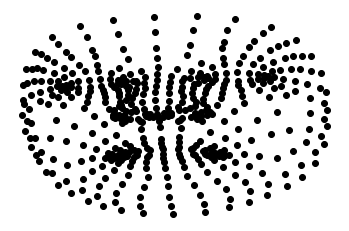

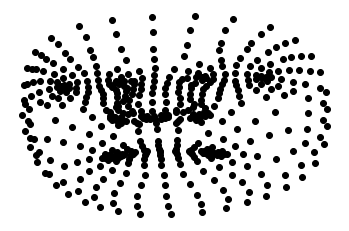

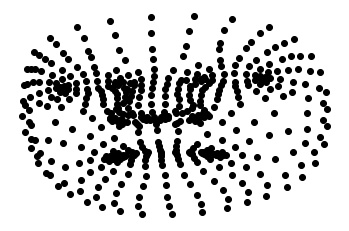

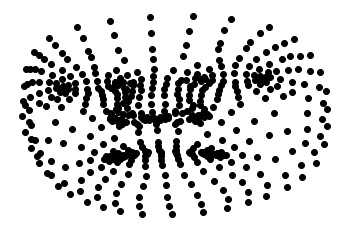

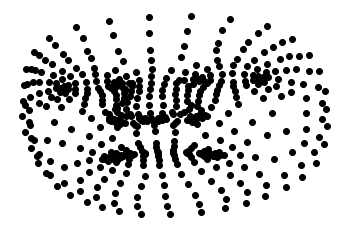

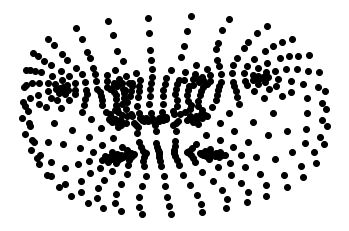

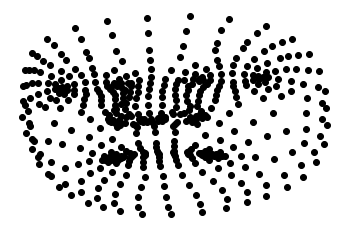

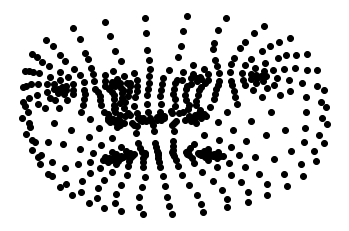

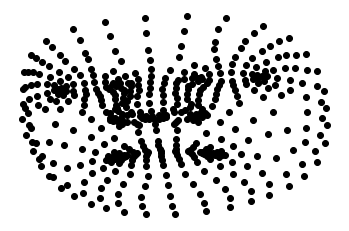

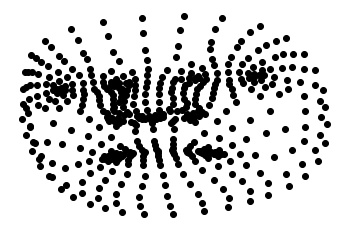

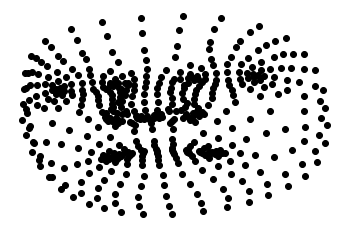

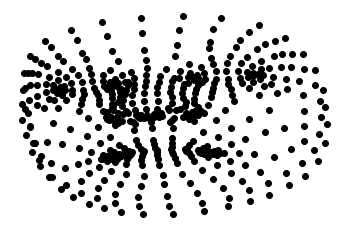

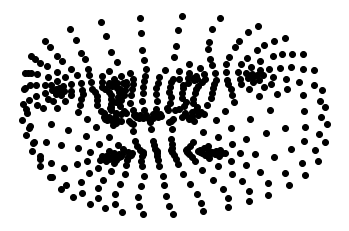

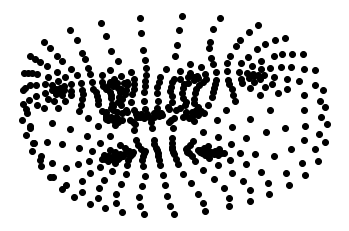

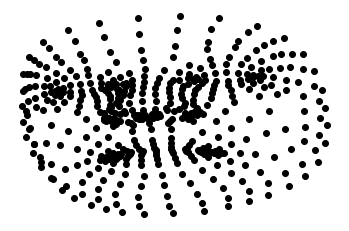

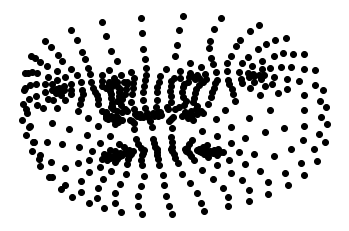

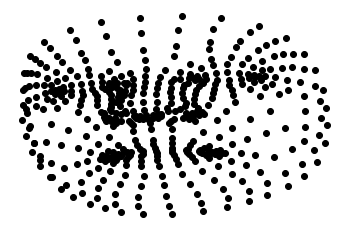

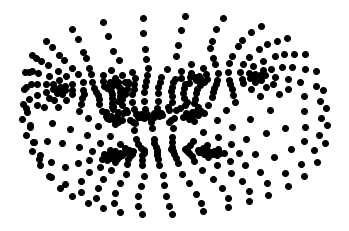

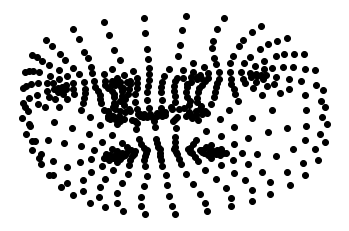

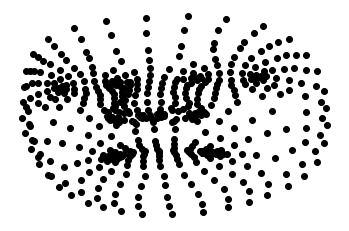

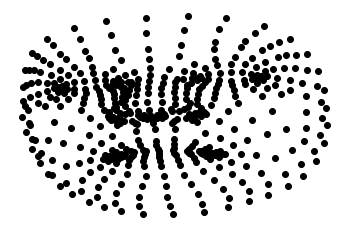

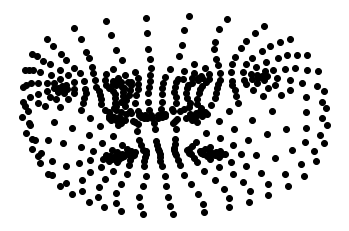

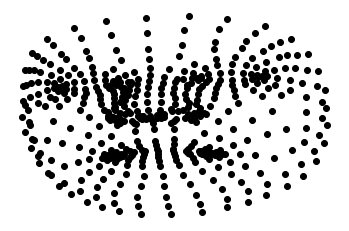

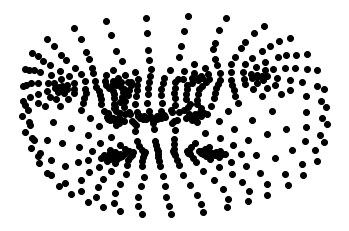

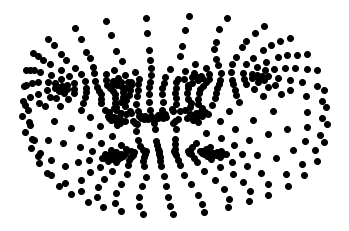

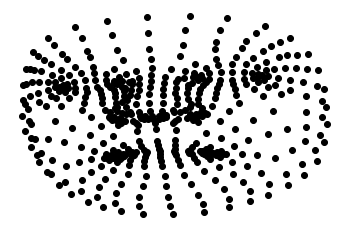

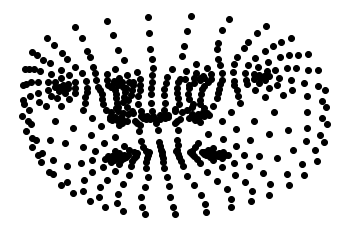

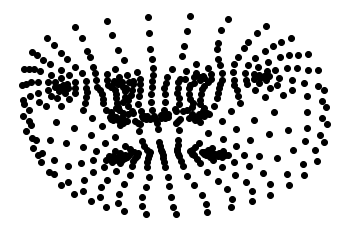

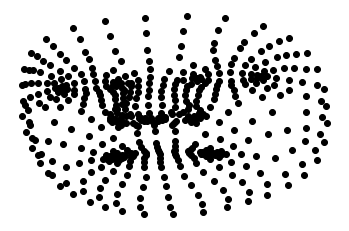

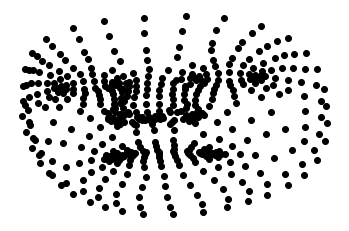

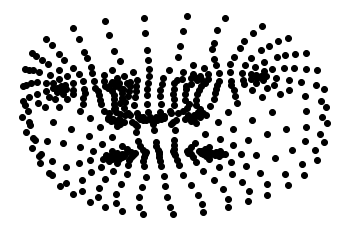

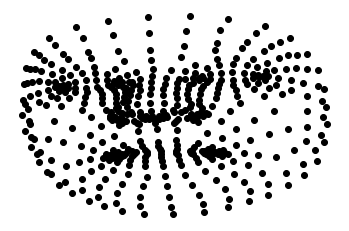

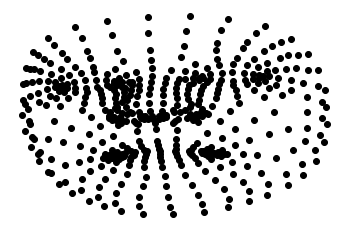

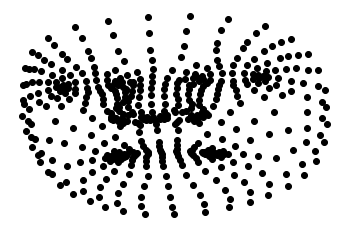

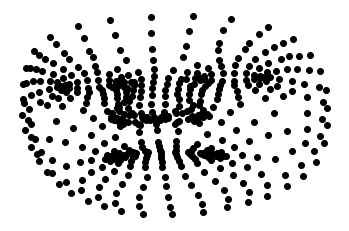

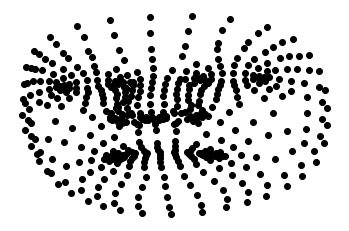

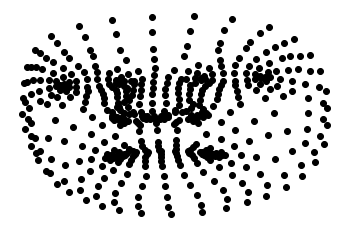

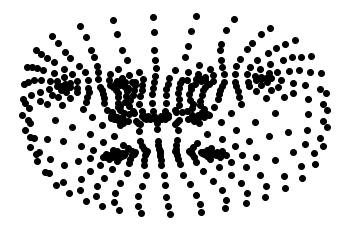

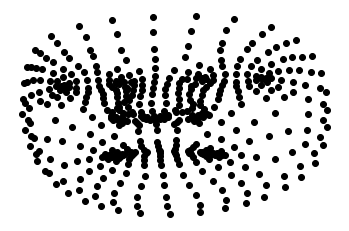

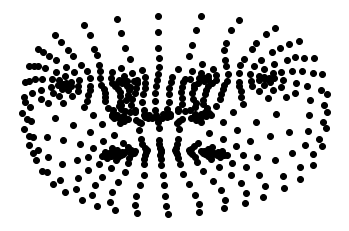

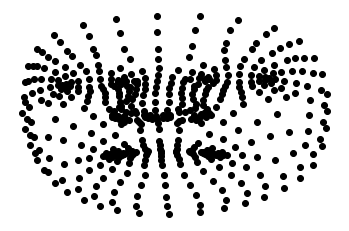

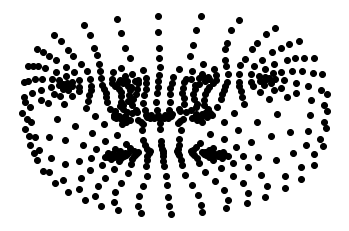

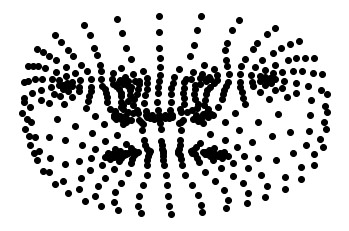

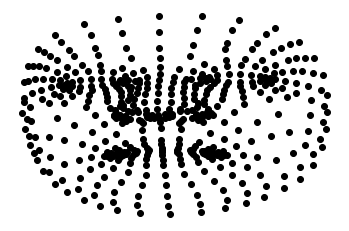

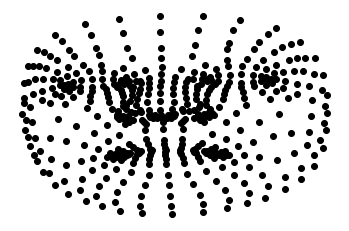

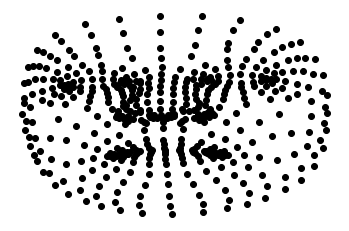

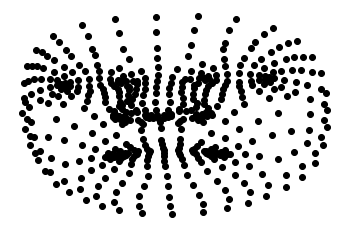

In [43]:
save_plot_image(df_mediapipe_xy, "mediapipe", "img_mediapipe", .01)

In [187]:
img_media_x, img_media_y = get_x_y_data(ast.literal_eval(df_mediapipe_xy.iloc[111]["landmarks"]))

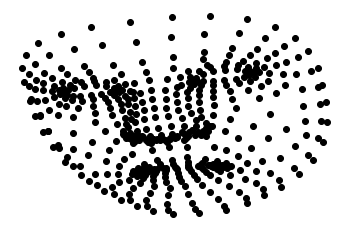

In [189]:
plot_x_y(img_media_x, img_media_y)

In [46]:
imgs_mediapipe_xy_np = list(map(lambda x: ast.literal_eval(x), df_mediapipe_xy["landmarks"].values))

In [45]:
def make_df_mediapipe_dlib_window_8(imgs_xy_np):
    imgs_mediapipe_xy_reduced = {}
    imgs_mediapipe_xy_reduced["landmarks"] = []
    for i, X in enumerate(imgs_xy_np):
        img_mediapipe_xy_reduced = []
        for i in range(0, 468, 7):
            img_mediapipe_xy_reduced.append(X[i])
        img_mediapipe_xy_reduced.append(X[-1])
        imgs_mediapipe_xy_reduced["landmarks"].append(img_mediapipe_xy_reduced)
    return pd.DataFrame(data=imgs_mediapipe_xy_reduced)

In [47]:
df_imgs_68_mediapipe = make_df_mediapipe_dlib_window_8(imgs_mediapipe_xy_np)

In [53]:
len(df_imgs_68_mediapipe.iloc[0]["landmarks"])

68

In [54]:
img_68_media_x, img_68_media_y =get_x_y_data(df_imgs_68_mediapipe["landmarks"].values[0])

### Interpolação dos pontos

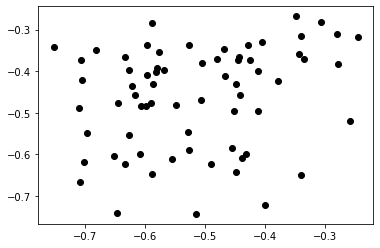

In [62]:
plot_x_y(img_68_media_x, img_68_media_y)

In [63]:
img_media_test_x, img_media_test_y = get_x_y_data(ast.literal_eval(df_mediapipe_xy["landmarks"].values[0]))

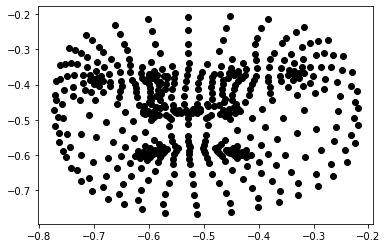

In [65]:
plot_x_y(img_media_test_x, img_media_test_y)

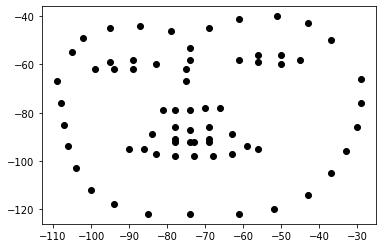

In [66]:
plot_x_y(img_data_x, img_data_y)

### Mapiando as landmarks

### K-Means

In [75]:
from sklearn.cluster import KMeans

In [76]:
kmeans_x = KMeans(n_clusters=68, random_state=0).fit(df_x)

<ipython-input-76-e3398ffdeed9>:1: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (68). Possibly due to duplicate points in X.
  kmeans_x = KMeans(n_clusters=68, random_state=0).fit(df_x)


In [81]:
len(kmeans_x.cluster_centers_[0]), len(kmeans_x.cluster_centers_)

(468, 68)

In [80]:
len(df_x)

7633

In [82]:
df_kmeans_x = pd.DataFrame(kmeans_x.transform(df_x))

In [83]:
df_kmeans_x

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
kmeans_y = KMeans(n_clusters=68, random_state=0).fit(df_y)

<ipython-input-84-c89184c8e869>:1: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (68). Possibly due to duplicate points in X.
  kmeans_y = KMeans(n_clusters=68, random_state=0).fit(df_y)


In [85]:
df_kmeans_y = pd.DataFrame(kmeans_x.transform(df_y))

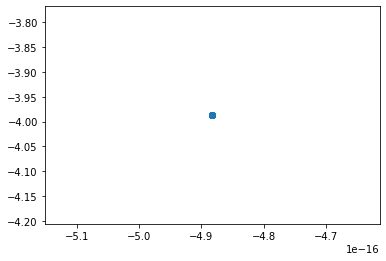

In [86]:
plot_x_y(df_kmeans_x.iloc[0], df_kmeans_y.iloc[0])